In [1]:
# Just playing around again
#  lets use redshifts 0.4 - 0.6
#  snapshots: 026, 025, 024, 023 = z: 0.4, 0.47, 0.54, 0.61 (from 34 snaps)
#  can use IllustrisTNG: LH, 1P, CV, EX, BE
#  start with LH as has the most
import numpy as np
import h5py
import hdf5plugin
import matplotlib.pyplot as plt
 # flares
'''
import flares
import scipy
import numba
import schwimmbad
import eagle_IO
import SynthObs
'''

'\nimport flares\nimport scipy\nimport numba\nimport schwimmbad\nimport eagle_IO\nimport SynthObs\n'

# SUBHALOS

In [2]:
# get the name of Subfind halo catalog
subhalos  = '/home/jovyan/Data/FOF_Subfind/IllustrisTNG/CV/CV_0/fof_subhalo_tab_026.hdf5'
# read halo catalogue
subh = h5py.File(subhalos, 'r')
subh.keys()

<KeysViewHDF5 ['Config', 'Group', 'Header', 'IDs', 'Parameters', 'Subhalo']>

In [3]:
subh['Group'].keys()

<KeysViewHDF5 ['GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200']>

In [20]:
subh['Parameters']

<HDF5 group "/Parameters" (0 members)>

In [4]:
subh['Subhalo'].keys()

<KeysViewHDF5 ['SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetalFractionsHalfRad', 'SubhaloStarMetalFractionsMaxRad', 'SubhaloStarMetallicity', 'SubhaloStarMetallicityHalfRad', '

In [5]:
pos_h     = subh['Group/GroupPos'][:]/1e3   #Mpc/h
vel_h     = subh['Group/GroupVel'][:]       #km/s
SFR_h     = subh['Group/GroupSFR'][:]       #Msun/yr
mass_h    = subh['Group/GroupMass'][:]*1e10 #Msun/h
len_h     = subh['Group/GroupLen'][:]       #the total number of particles in the halo (gas+dm+stars+black_holes)
lentype_h = subh['Group/GroupLenType'][:]   #the number of particles in a halo by particle type
#subh.close()

In [6]:
index = 167 #index of the halo
print('position:',pos_h[index],'Mpc/h')
print('velocity:',vel_h[index],'km/s')
print('mass: %.3e Msun/h'%mass_h[index])
print('total length:',len_h[index],'particles')
print('number of particles by type:',lentype_h[index])

position: [15.942893  16.68846    3.9835398] Mpc/h
velocity: [-145.14125 -160.77405  -94.18773] km/s
mass: 3.263e+11 Msun/h
total length: 7176 particles
number of particles by type: [2274 4497    0    0  404    1]


#PartType0. This group contains the properties of the gas particles.

#PartType1. This group contains the properties of the dark matter particles.

#PartType4. This group contains the properties of the star particles.

#PartType5. This group contains the properties of the black hole particles.

In [7]:
# need PartType4 for stars
mass_h = subh['Subhalo/SubhaloMass'][:]
print('Halo mass: ', mass_h)

mass_h_msun = mass_h[:] * 1e10 / 0.704
print('Halo Mass in M sun', mass_h_msun)

Halo mass:  [4.2043770e+03 1.9805407e+01 3.5713192e+01 ... 1.6220157e-01 1.6220157e-01
 1.6868964e-01]
Halo Mass in M sun [5.9721264e+13 2.8132681e+11 5.0728967e+11 ... 2.3039997e+09 2.3039997e+09
 2.3961597e+09]


In [ ]:
# the mass of all star particles associated with a subhalo, is given by SubhaloMassType
mass_star = subh['Subhalo/SubhaloMassType'][:]
print('Halo mass: ', mass_star)

mass_star_msun = mass_star[:] * 1e10# / 0.704 - not sure on this yet
print('Halo Mass in M sun', mass_star)

In [8]:
# The units of stellar masses ouput by the model are 1e10 Msol.  Let's convert
# this to log10(M/Msol).
mass_h_msol = np.log10(mass_h[:]*1e10)
print('Halo mass in log10(M/Msol): ', mass_h_msol)

Halo mass in log10(M/Msol):  [13.623702 11.296783 11.552829 ...  9.210055  9.210055  9.227088]


In [9]:
subh_SFR = subh['Subhalo/SubhaloSFRinRad'][:]
print('Star formation rate Msun/year', subh_SFR)

Star formation rate Msun/year [3.7453058 0.        1.5754815 ... 0.        0.        0.       ]


Text(0, 0.5, 'Star Formation Rate [$M_\\odot / yr$]')

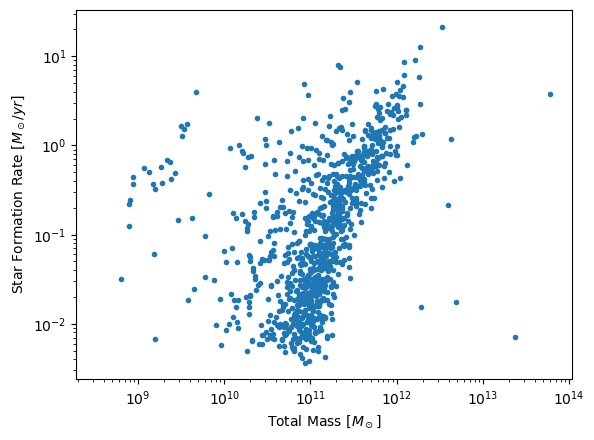

In [10]:
plt.plot(mass_h_msun,subh_SFR,'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Mass [$M_\odot$]')
plt.ylabel('Star Formation Rate [$M_\odot / yr$]')

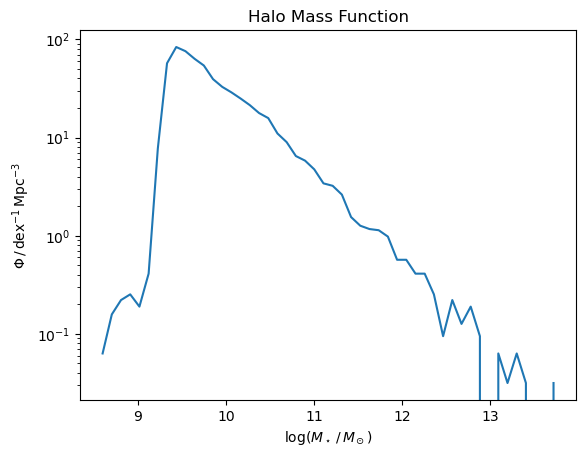

In [11]:
# initial try at galaxy stellar mass function
logMsun  = np.log10(mass_h_msun)                     #Take logarithm
nbins = 50                              #Number of bins to divide data into
V     = 302.6                             #Survey volume in Mpc3 (302.6Mpc for TNG300 - https://www.tng-project.org/data/docs/background/)
Phi,edg = np.histogram(logMsun,bins=nbins) #Unnormalized histogram and bin edges
dM    = edg[1] - edg[0]                 #Bin size
Max   = edg[0:-1] + dM/2.               #Mass axis
Phi   = Phi / V / dM                    #Normalize to volume and bin size

plt.clf()
plt.title('Halo Mass Function')
plt.yscale('log')
plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi\,/\,\mathrm{dex}^{-1}\,\mathrm{Mpc}^{-3}$')
plt.plot(Max,Phi)

In [12]:
# Stellar mass functions describe the number density of galaxies as
# a function of their stellar mass. They represent a key measure for
# the properties of the galaxy population and allow us to trace the
# assembly of stellar mass and the evolution of the star formation rate
# (SFR) through cosmic time.

# use Flares package:
def calc_df(mstar, volume, massBinLimits):

    hist, dummy = np.histogram(np.log10(mstar), bins = massBinLimits)
    hist = np.float64(hist)
    phi = (hist / volume) / (massBinLimits[1] - massBinLimits[0])

    # p = 0.95
    # phi_sigma = np.array([scipy.stats.chi2.ppf((1.-p)/2.,2*hist)/2.,
    #                       scipy.stats.chi2.ppf(p+(1.-p)/2.,2*(hist+1))/2.])

    # phi_sigma = (phi_sigma / volume) / (massBinLimits[1] - massBinLimits[0])

    phi_sigma = (np.sqrt(hist) / volume) /\
                (massBinLimits[1] - massBinLimits[0]) # Poisson errors

    return phi, phi_sigma, hist

msun_max = mass_h_msun.max()
msun_min = mass_h_msun.min()
bins = [np.log10(msun_min), np.log10(msun_max)]

phi, phi_sigma, hist = calc_df(mass_h_msun, V, bins) # Not sure on mass bin limits so try a few things
print('phi: ', phi)
print('phi_sigma: ', phi_sigma)
print('hist: ', hist)
print('Phi: ', Phi)

plt.clf()
plt.title('Galaxy Stellar Mass Function')
plt.yscale('log')
plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi\,/\,\mathrm{dex}^{-1}\,\mathrm{Mpc}^{-3}$')
plt.plot(mass_sh_msun,phi)

In [13]:
# Taken from Meraxes/Munge Documentation
# https://www.ph.unimelb.edu.au/~smutch/docs/dragons/_modules/dragons/munge/munge.html#mass_function
def mass_function(mass, volume, bins, range=None, poisson_uncert=False,
                  return_edges=False, **kwargs):

    """Generate a mass function.

    *Args*:
        mass : array
            an array of 'masses'

        volume : float
            volume of simulation cube/subset

        bins : int or list or str
            If bins is a string, then it must be one of:
                | 'blocks'   : use bayesian blocks for dynamic bin widths
                | 'knuth'    : use Knuth's rule to determine bins
                | 'scott'    : use Scott's rule to determine bins
                | 'freedman' : use the Freedman-diaconis rule to determine bins

    *Kwargs*:
        range : len=2 list or array
            range of data to be used for mass function

        poisson_uncert : bool
            return poisson uncertainties in output array (default: False)

        return_edges : bool
            return the bin_edges (default: False)

        \*\*kwargs
            passed to np.histogram call

    *Returns*:
        array of [bin centers, mass function vals]

        If poisson_uncert=True then array has 3rd column with uncertainties.

        If return_edges=True then the bin edges are also returned.

    *Notes*:
        The code to generate the bin_widths is taken from astroML.hist

    """

    if "normed" in kwargs:
        kwargs["normed"] = False
        log.warn("Turned off normed kwarg in mass_function()")

    if (range is not None and (bins in ['blocks',
                                        'knuth', 'knuths',
                                        'scott', 'scotts',
                                        'freedman', 'freedmans'])):
        mass = mass[(mass >= range[0]) & (mass <= range[1])]

    if isinstance(bins, str):
        log.info("Calculating bin widths using `%s' method..." % bins)
        if bins in ['blocks']:
            bins = bayesian_blocks(mass)
        elif bins in ['knuth', 'knuths']:
            dm, bins = knuth_bin_width(mass, True)
        elif bins in ['scott', 'scotts']:
            dm, bins = scotts_bin_width(mass, True)
        elif bins in ['freedman', 'freedmans']:
            dm, bins = freedman_bin_width(mass, True)
        else:
            raise ValueError("unrecognized bin code: '%s'" % bins)
        log.info("...done")

    vals, edges = np.histogram(mass, bins, range, **kwargs)
    width = edges[1]-edges[0]
    radius = width/2.0
    centers = edges[:-1]+radius
    if poisson_uncert:
        uncert = np.sqrt(vals.astype(float))

    vals = vals.astype(float) / (volume * width)

    if not poisson_uncert:
        mf = np.dstack((centers, vals)).squeeze()
    else:
        uncert /= (volume * width)
        mf = np.dstack((centers, vals, uncert)).squeeze()

    if not return_edges:
        return mf
    else:
        return mf, edges


hmf = mass_function(mass_h_msol,V, bins=50,range=None)

#print(plot_number)
fig, ax = plt.subplots(1, 1)
plt.title("Halo Mass Function test")
plot_label = ('Halo mass in Msolar ')

ax.plot(hmf[:, 0], np.log10(hmf[:, 1]), color=np.random.rand(3,), lw=2,
            label=plot_label)

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_* / {\rm M_{\odot}})$")
ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^3})$")

# Add the legend
ax.legend(loc="lower left")

# Finally save the figure as a PDF
plt.tight_layout()

# STELLAR MASS

In [14]:
## CV_0/snap_026.hdf5
# Need to use PartType4 Masses for STELLAR Mass, not Halo mass
snap_stars  = '/home/jovyan/Data/Sims/IllustrisTNG/CV/CV_0/snap_026.hdf5'
data = h5py.File(snap_stars, 'r')
BoxSize      = data['Header'].attrs[u'BoxSize']/1e3    #size of the snapshot in comoving Mpc/h
redshift     = data['Header'].attrs[u'Redshift']       #reshift of the snapshot
print('Box size:                 %.2f Mpc/h'%BoxSize)
print('snapshot redshift:        %.2f'%redshift)

Box size:                 25.00 Mpc/h
snapshot redshift:        0.40


In [15]:
mass_stars = data['PartType4/Masses'][:] # in 1e10𝑀⊙/ℎ
mass_stars = data['PartType4/Masses'][:]*1e10 # in 𝑀⊙
print('Mass of Stars: ',mass_stars[:])

Mass of Stars:  [ 7750311.  13212746.   7943322.  ... 10021982.   6979543.5 14673104. ]


In [16]:
mass_min, mass_max = mass_stars.min(), mass_stars.max()
mass_range = [mass_min, mass_max]
print('Mass Range: ',mass_range)

Mass Range:  [613224.56, 25205606.0]


In [17]:
V = BoxSize**3 
print('Volume', V, 'Mpc3')

smf = mass_function(mass_stars,V, bins=50,range=mass_range)
print('SMF :', smf)

Volume 15625.0 Mpc3
SMF : [[8.59148375e+05 4.55425543e-09]
 [1.35099612e+06 1.18410641e-08]
 [1.84284375e+06 2.21206692e-08]
 [2.33469125e+06 2.44628577e-08]
 [2.82653875e+06 3.09689369e-08]
 [3.31838650e+06 4.25497578e-08]
 [3.81023400e+06 2.00387239e-07]
 [4.30208200e+06 6.26145060e-07]
 [4.79392950e+06 1.13153729e-06]
 [5.28577700e+06 1.81077196e-06]
 [5.77762500e+06 2.53880222e-06]
 [6.26947250e+06 3.28778205e-06]
 [6.76132000e+06 4.01242915e-06]
 [7.25316750e+06 4.68008300e-06]
 [7.74501550e+06 5.46029201e-06]
 [8.23686300e+06 5.26016502e-06]
 [8.72871100e+06 5.30271478e-06]
 [9.22055800e+06 5.20108982e-06]
 [9.71240600e+06 4.96843243e-06]
 [1.02042540e+07 4.62829461e-06]
 [1.06961010e+07 4.25081189e-06]
 [1.11879490e+07 3.79915988e-06]
 [1.16797960e+07 3.37795631e-06]
 [1.21716440e+07 2.93072843e-06]
 [1.26634920e+07 2.52722140e-06]
 [1.31553390e+07 2.09508762e-06]
 [1.36471870e+07 1.69769630e-06]
 [1.41390350e+07 1.35990067e-06]
 [1.46308820e+07 1.07142112e-06]
 [1.51227300e+07 

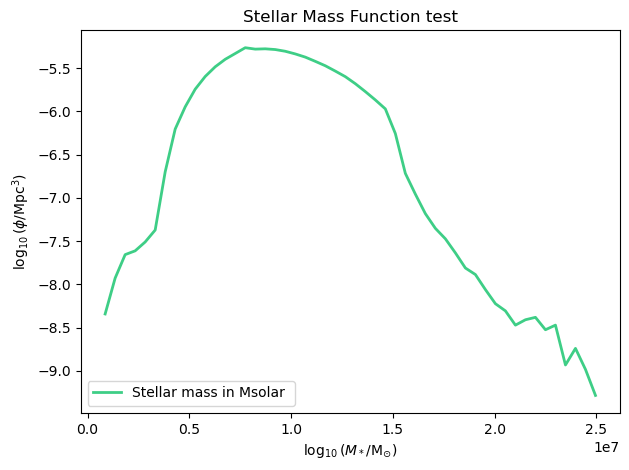

In [18]:
#print(plot_number)
fig, ax = plt.subplots(1, 1)
plt.title("Stellar Mass Function test")
plot_label = ('Stellar mass in Msolar ')
# x,y
#x = np.log10(smf[:, 0])
x = smf[:,0]
y = np.log10(smf[:,1])
#y = smf[:, 1]
ax.plot(x,y, color=np.random.rand(3,), lw=2,
            label=plot_label)

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_* / {\rm M_{\odot}})$")
ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^3})$")

# Apply logarithmic scale to both x and y axes
#ax.set_xscale('log')
#ax.set_yscale('log')  # A

# Add the legend
ax.legend(loc="lower left")

# Finally save the figure as a PDF
plt.tight_layout()